# Treemerge test

Mamie Wang 2021/01/22


https://github.com/ekmolloy/trees-in-the-desert-tutorial

Example usage:

python ./python/treemerge.py \
    -s ../trees-in-the-desert-tutorial/data/nj-on-agid-tre.txt \
    -t ../trees-in-the-desert-tutorial/data/astral-subset-1-outof-4-tre.txt \
       ../trees-in-the-desert-tutorial/data/astral-subset-2-outof-4-tre.txt \
       ../trees-in-the-desert-tutorial/data/astral-subset-3-outof-4-tre.txt \
       ../trees-in-the-desert-tutorial/data/astral-subset-4-outof-4-tre.txt \
    -m ../trees-in-the-desert-tutorial/data/agid-mat.txt \
    -x ../trees-in-the-desert-tutorial/data/agid-mat.txt_taxlist \
    -o treemerge-on-astral-and-agid-tre.txt \
    -w . \
    -p ./paup4a168_centos64

In [11]:
import sys, os

sys.path.append("/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/spectraltree")

import generation
import reconstruct_tree
import time
import utils
import pandas as pd
import argparse


m = 300
kappa = 2
mutation_rate=0.05
threshold = 64
verbose = False

# Binary Tree

In [26]:
tree = utils.balanced_binary(1024)

filename = '/gpfs/ysm/scratch60/morgan_levine/mw957/binary/true_tree.txt'
tree.write(path=filename, schema="newick")

In [7]:
import importlib
importlib.reload(reconstruct_tree)

<module 'reconstruct_tree' from '/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/spectraltree/reconstruct_tree.py'>

In [10]:
observations, taxa_meta = generation.simulate_sequences(m, tree_model=tree, seq_model=generation.Jukes_Cantor(), mutation_rate=mutation_rate, alphabet="DNA")

spectral_method = reconstruct_tree.SpectralTreeReconstruction(reconstruct_tree.NeighborJoining, reconstruct_tree.JC_similarity_matrix)
start_time = time.time()
tree_rec = spectral_method.deep_spectral_tree_reconstruction(observations, reconstruct_tree.JC_similarity_matrix, 
                                                            taxa_metadata = taxa_meta,
                                                            threshhold = threshold, min_split = 5, 
                                                             verbose = verbose)
end_time = time.time() - start_time
print(end_time)

4.272215127944946


In [ ]:
tree_rec = spectral_method.deep_spectral_tree_reconstruction(observations, reconstruct_tree.JC_similarity_matrix, 
                                                            taxa_metadata = taxa_meta,
                                                            threshhold = threshold, min_split = 5, 
                                                            verbose = verbose, subtree_filename='/gpfs/ysm/scratch60/morgan_levine/mw957/binary/subtree-%s.txt')

In [12]:
# 17 subtrees
filename = '/gpfs/ysm/scratch60/morgan_levine/mw957/binary/STDR_tree.txt'
tree_rec.write(path=filename, schema="newick")

In [13]:
RF,F1 = reconstruct_tree.compare_trees(tree_rec, tree)

print("RF = ",RF)
print("F1% = ",F1) 

RF =  34
F1% =  99.16911045943304


In [14]:
# get the distance matrix

distance = reconstruct_tree.JC_distance_matrix(observations, taxa_meta)
distance_pd = pd.DataFrame(distance)

taxa_list = [x.label for x in taxa_meta]

In [15]:
#save as phylip format

with open('/gpfs/ysm/scratch60/morgan_levine/mw957/binary/taxa.txt', 'w') as f:
    for item in taxa_list:
        f.write("%s\n" % item)

In [16]:
distance_pd.index = taxa_list

In [17]:
distance_pd.to_csv("/gpfs/ysm/scratch60/morgan_levine/mw957/binary/JC_distance.txt", 
                   sep = "\t", header = False)

add a line for the tree size at the beginning of the distance_pd. Run treemerge:

In [ ]:
python /gpfs/ysm/project/kleinstein/mw957/repos/treemerge/python/treemerge.py \
-s STDR_tree.txt \
-t subtree-*.txt \
-m JC_distance.txt \
-x taxa.txt \
-o treemerge-on-STDR-subtree.txt \
-w . \
-p /gpfs/ysm/project/kleinstein/mw957/repos/treemerge/paup4a168_centos64 

In [20]:
# read in the tree merged based on STDR trees
import dendropy

In [21]:
tree_true = dendropy.Tree.get(path = "/gpfs/ysm/scratch60/morgan_levine/mw957/binary/true_tree.txt",
        schema="newick")

tree_new = dendropy.Tree.get(path = "/home/mw957/scratch60/binary/treemerge-on-STDR-subtree.txt", 
                             schema="newick",
                             taxon_namespace=tree_true.taxon_namespace)

In [22]:
RF,F1 = reconstruct_tree.compare_trees(tree_new, tree_true)

print("RF = ",RF)
print("F1% = ",F1) 

RF =  142
F1% =  96.52981427174976


The runtime is 194 seconds.

# Caterpillar tree

In [23]:
tree = utils.lopsided_tree(1024)

filename = '/gpfs/ysm/scratch60/morgan_levine/mw957/caterpillar_tree//true_tree.txt'
tree.write(path=filename, schema="newick")

In [10]:
# reload the package

import importlib
importlib.reload(reconstruct_tree)

<module 'reconstruct_tree' from '/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/spectraltree/reconstruct_tree.py'>

In [39]:
observations, taxa_meta = generation.simulate_sequences(m, tree_model=tree, seq_model=generation.Jukes_Cantor(), 
                                                        mutation_rate=mutation_rate, alphabet="DNA")

spectral_method = reconstruct_tree.SpectralTreeReconstruction(reconstruct_tree.NeighborJoining, reconstruct_tree.JC_similarity_matrix)

start_time = time.time()
tree_rec = spectral_method.deep_spectral_tree_reconstruction(observations, reconstruct_tree.HKY_similarity_matrix, 
                                                            taxa_metadata = taxa_meta,
                                                            threshhold = threshold, min_split = 5, verbose = verbose)
end_time = time.time() - start_time
print(end_time)

89.75087451934814


In [40]:
tree_rec = spectral_method.deep_spectral_tree_reconstruction(observations, reconstruct_tree.HKY_similarity_matrix_similarity_matrix, 
                                                            taxa_metadata = taxa_meta,
                                                            threshhold = threshold, min_split = 5, verbose = verbose,
                                                            subtree_filename= '/gpfs/ysm/scratch60/morgan_levine/mw957/caterpillar_tree/subtree-%s.txt')

In [41]:
filename = '/gpfs/ysm/scratch60/morgan_levine/mw957/caterpillar_tree/STDR_tree.txt'
tree_rec.write(path=filename, schema="newick")

In [42]:
RF,F1 = reconstruct_tree.compare_trees(tree_rec, tree)

print("RF = ",RF)
print("F1% = ",F1) 

RF =  74
F1% =  98.19159335288367


In [ ]:
# get the distance matrix

sim = reconstruct_tree.HKY_similarity_matrix(observations, taxa_meta)

In [44]:
import numpy as np

distance = np.exp(-sim)

distance_pd = pd.DataFrame(distance)

taxa_list = [x.label for x in taxa_meta]

In [45]:
#save as phylip format

with open('/gpfs/ysm/scratch60/morgan_levine/mw957/caterpillar_tree/taxa.txt', 'w') as f:
    for item in taxa_list:
        f.write("%s\n" % item)

In [46]:
distance_pd.index = taxa_list

In [47]:
distance_pd.to_csv("/gpfs/ysm/scratch60/morgan_levine/mw957/caterpillar_tree/JC_distance.txt", 
                   sep = "\t", header = False)

add a line for the tree size at the beginning of the distance_pd. Run treemerge:

In [ ]:
python /gpfs/ysm/project/kleinstein/mw957/repos/treemerge/python/treemerge.py \
-s STDR_tree.txt \
-t subtree-*.txt \
-m JC_distance.txt \
-x taxa.txt \
-o treemerge-on-STDR-subtree.txt \
-w . \
-p /gpfs/ysm/project/kleinstein/mw957/repos/treemerge/paup4a168_centos64 

In [48]:
tree_true = dendropy.Tree.get(path = "/gpfs/ysm/scratch60/morgan_levine/mw957/caterpillar_tree/true_tree.txt",
        schema="newick")

tree_new = dendropy.Tree.get(path = "/home/mw957/scratch60/caterpillar_tree/treemerge-on-STDR-subtree.txt", 
                             schema="newick",
                             taxon_namespace=tree_true.taxon_namespace)

In [49]:
RF,F1 = reconstruct_tree.compare_trees(tree_new, tree_true)

print("RF = ",RF)
print("F1% = ",F1) 

RF =  1122
F1% =  72.58064516129033


## 513 seconds

# Kingman tree

In [51]:
tree = utils.unrooted_pure_kingman_tree(1024)

filename = '/gpfs/ysm/scratch60/morgan_levine/mw957/kingman/true_tree.txt'
tree.write(path=filename, schema="newick")

In [6]:
# reload the package

import importlib
importlib.reload(reconstruct_tree)

<module 'reconstruct_tree' from '/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/spectraltree/reconstruct_tree.py'>

In [53]:
observations, taxa_meta = generation.simulate_sequences(m, tree_model=tree, seq_model=generation.Jukes_Cantor(), 
                                                        mutation_rate=mutation_rate, alphabet="DNA")

spectral_method = reconstruct_tree.SpectralTreeReconstruction(reconstruct_tree.NeighborJoining, reconstruct_tree.JC_similarity_matrix)

start_time = time.time()
tree_rec = spectral_method.deep_spectral_tree_reconstruction(observations, reconstruct_tree.HKY_similarity_matrix, 
                                                            taxa_metadata = taxa_meta,
                                                            threshhold = threshold, min_split = 5, verbose = verbose)
end_time = time.time() - start_time
print(end_time)

/home/mw957/project/conda_envs/r_env/lib/python3.7/site-packages/sklearn/decomposition/_truncated_svd.py:197: RuntimeWarning: divide by zero encountered in true_divide
  self.explained_variance_ratio_ = exp_var / full_var
/home/mw957/project/conda_envs/r_env/lib/python3.7/site-packages/sklearn/decomposition/_truncated_svd.py:197: RuntimeWarning: divide by zero encountered in true_divide
  self.explained_variance_ratio_ = exp_var / full_var
/home/mw957/project/conda_envs/r_env/lib/python3.7/site-packages/sklearn/decomposition/_truncated_svd.py:197: RuntimeWarning: divide by zero encountered in true_divide
  self.explained_variance_ratio_ = exp_var / full_var
/home/mw957/project/conda_envs/r_env/lib/python3.7/site-packages/sklearn/decomposition/_truncated_svd.py:197: RuntimeWarning: divide by zero encountered in true_divide
  self.explained_variance_ratio_ = exp_var / full_var
/home/mw957/project/conda_envs/r_env/lib/python3.7/site-packages/sklearn/decomposition/_truncated_svd.py:197: Ru

89.7973210811615


In [54]:
tree_rec = spectral_method.deep_spectral_tree_reconstruction(observations, reconstruct_tree.HKY_similarity_matrix, 
                                                            taxa_metadata = taxa_meta,
                                                            threshhold = threshold, min_split = 5, verbose = verbose,
                                                            subtree_filename = "/gpfs/ysm/scratch60/morgan_levine/mw957/kingman/subtree-%s.txt")

/home/mw957/project/conda_envs/r_env/lib/python3.7/site-packages/sklearn/decomposition/_truncated_svd.py:197: RuntimeWarning: divide by zero encountered in true_divide
  self.explained_variance_ratio_ = exp_var / full_var
/home/mw957/project/conda_envs/r_env/lib/python3.7/site-packages/sklearn/decomposition/_truncated_svd.py:197: RuntimeWarning: divide by zero encountered in true_divide
  self.explained_variance_ratio_ = exp_var / full_var
/home/mw957/project/conda_envs/r_env/lib/python3.7/site-packages/sklearn/decomposition/_truncated_svd.py:197: RuntimeWarning: divide by zero encountered in true_divide
  self.explained_variance_ratio_ = exp_var / full_var
/home/mw957/project/conda_envs/r_env/lib/python3.7/site-packages/sklearn/decomposition/_truncated_svd.py:197: RuntimeWarning: divide by zero encountered in true_divide
  self.explained_variance_ratio_ = exp_var / full_var
/home/mw957/project/conda_envs/r_env/lib/python3.7/site-packages/sklearn/decomposition/_truncated_svd.py:197: Ru

In [57]:
filename = '/gpfs/ysm/scratch60/morgan_levine/mw957/kingman/STDR_tree.txt'
tree_rec.write(path=filename, schema="newick")

In [58]:
RF,F1 = reconstruct_tree.compare_trees(tree_rec, tree)

print("RF = ",RF)
print("F1% = ",F1) 

RF =  1758
F1% =  57.03812316715544


In [60]:
# get the distance matrix

sim = reconstruct_tree.HKY_similarity_matrix(observations, taxa_meta)

distance = np.exp(-sim)
distance_pd = pd.DataFrame(distance)

taxa_list = [x.label for x in taxa_meta]

In [61]:
#save as phylip format

with open('/gpfs/ysm/scratch60/morgan_levine/mw957/kingman/taxa.txt', 'w') as f:
    for item in taxa_list:
        f.write("%s\n" % item)

In [62]:
distance_pd.index = taxa_list

In [63]:
distance_pd.to_csv("/gpfs/ysm/scratch60/morgan_levine/mw957/kingman/JC_distance.txt", 
                   sep = "\t", header = False)

add a line for the tree size at the beginning of the distance_pd. Run treemerge:

In [ ]:
python /gpfs/ysm/project/kleinstein/mw957/repos/treemerge/python/treemerge.py \
-s STDR_tree.txt \
-t subtree-*.txt \
-m JC_distance.txt \
-x taxa.txt \
-o treemerge-on-STDR-subtree.txt \
-w . \
-p /gpfs/ysm/project/kleinstein/mw957/repos/treemerge/paup4a168_centos64 

In [64]:
tree_true = dendropy.Tree.get(path = "/gpfs/ysm/scratch60/morgan_levine/mw957/kingman/true_tree.txt",
        schema="newick")

tree_new = dendropy.Tree.get(path = "/home/mw957/scratch60/kingman/treemerge-on-STDR-subtree.txt", 
                             schema="newick",
                             taxon_namespace=tree_true.taxon_namespace)

In [65]:
RF,F1 = reconstruct_tree.compare_trees(tree_new, tree_true)

print("RF = ",RF)
print("F1% = ",F1) 

RF =  1798
F1% =  56.060606060606055


## 216 seconds

# unrooted_birth_death_tree

In [66]:
tree = utils.unrooted_birth_death_tree(1024)

filename = '/gpfs/ysm/scratch60/morgan_levine/mw957/birthdeath/true_tree.txt'
tree.write(path=filename, schema="newick")

In [3]:
# reload the package

import importlib
importlib.reload(reconstruct_tree)

<module 'reconstruct_tree' from '/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/spectraltree/reconstruct_tree.py'>

In [67]:
observations, taxa_meta = generation.simulate_sequences(m, tree_model=tree, seq_model=generation.Jukes_Cantor(), 
                                                        mutation_rate=mutation_rate, alphabet="DNA")

spectral_method = reconstruct_tree.SpectralTreeReconstruction(reconstruct_tree.NeighborJoining, reconstruct_tree.JC_similarity_matrix)
start_time = time.time()
tree_rec = spectral_method.deep_spectral_tree_reconstruction(observations, reconstruct_tree.HKY_similarity_matrix, 
                                                            taxa_metadata = taxa_meta,
                                                            threshhold = threshold, min_split = 5, verbose = verbose)
end_time = time.time() - start_time
print(end_time)

93.53313970565796


In [68]:
filename = '/gpfs/ysm/scratch60/morgan_levine/mw957/birthdeath/STDR_tree.txt'
tree_rec.write(path=filename, schema="newick")

In [69]:
RF,F1 = reconstruct_tree.compare_trees(tree_rec, tree)

print("RF = ",RF)
print("F1% = ",F1) 

RF =  452
F1% =  88.95405669599218


In [70]:
tree_rec = spectral_method.deep_spectral_tree_reconstruction(observations, reconstruct_tree.HKY_similarity_matrix, 
                                                            taxa_metadata = taxa_meta,
                                                            threshhold = threshold, min_split = 5, verbose = verbose,
                                                            subtree_filename = "/gpfs/ysm/scratch60/morgan_levine/mw957/birthdeath/subtree-%s.txt")

In [71]:
# get the distance matrix

sim = reconstruct_tree.HKY_similarity_matrix(observations, taxa_meta)
distance = np.exp(-sim)

distance_pd = pd.DataFrame(distance)

taxa_list = [x.label for x in taxa_meta]

In [72]:
#save as phylip format

with open('/gpfs/ysm/scratch60/morgan_levine/mw957/birthdeath/taxa.txt', 'w') as f:
    for item in taxa_list:
        f.write("%s\n" % item)

In [73]:
distance_pd.index = taxa_list

In [74]:
distance_pd.to_csv("/gpfs/ysm/scratch60/morgan_levine/mw957/birthdeath/JC_distance.txt", 
                   sep = "\t", header = False)

add a line for the tree size at the beginning of the diHKY_similarity_matrixd. Run treemerge:

In [ ]:
python /gpfs/ysm/project/kleinstein/mw957/repos/treemerge/python/treemerge.py \
-s STDR_tree.txt \
-t subtree-*.txt \
-m JC_distance.txt \
-x taxa.txt \
-o treemerge-on-STDR-subtree.txt \
-w . \
-p /gpfs/ysm/project/kleinstein/mw957/repos/treemerge/paup4a168_centos64 

In [11]:
# read in the tree merged based on STDR trees
import dendropy

tree_true = dendropy.Tree.get(path = "/gpfs/ysm/scratch60/morgan_levine/mw957/birthdeath/true_tree.txt",
        schema="newick")

tree_new = dendropy.Tree.get(path = "/home/mw957/scratch60/birthdeath/treemerge-on-STDR-subtree.txt", 
                             schema="newick",
                             taxon_namespace=tree_true.taxon_namespace)

In [76]:
RF,F1 = reconstruct_tree.compare_trees(tree_new, tree_true)

print("RF = ",RF)
print("F1% = ",F1) 

RF =  390
F1% =  90.4692082111437


## 121 seconds

In [4]:
# rewrite the functions so that it calls the function on commandline
# for each experiment (m = 2000, n = 2000 - 8000, mutation rate = 0.4)

# run STDR RAXML 128 and write out trees into a directory (tsv)


parameters = pd.read_csv("test_kingman_tree.lst", sep = "\t")

# pass the directory file to command line code to run mergetrees

In [5]:
parameters.head()

,type,method,nrun,size,path,threshold,m,kappa,mutation_rate,verbose
0,kingman,NJ,5,2000,None,0,2000,2,0.4,True
1,kingman,SNJ,5,2000,None,0,2000,2,0.4,True
2,kingman,RAxML,5,2000,None,0,2000,2,0.4,True
3,kingman,STDR+NJ,5,2000,None,256,2000,2,0.4,True
4,kingman,STDR+NJ,5,2000,None,128,2000,2,0.4,True


In [13]:
to_run = parameters.loc[(parameters.method == "STDR+RAxML") & (parameters.threshold == 128),:]
to_run.nrun = 1

/home/mw957/project/conda_envs/r_env/lib/python3.7/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [16]:
to_run.to_csv("kingman_2000_STDR_RAxML_128.lst", sep = "\t", index = False)

In [ ]:
m = 2000
tree = utils.unrooted_pure_kingman_tree(m)

filename = '../data/coalescent_tree_2000.txt'
tree.write(path=filename, schema="newick")

### step 1: write out all the tree files (job submitted as 49682250)

### step 2: write out the results for comparing with the treemerge

In [3]:
import os
import pandas as pd
import glob

In [12]:
# read in the tree path 
main_folder = "/gpfs/ysm/scratch60/morgan_levine/mw957/tree_merge_test/"
folders = os.listdir(main_folder)
folders = ["/gpfs/ysm/scratch60/morgan_levine/mw957/tree_merge_test/" + x for x in folders]

In [13]:
folder_dir = pd.DataFrame({"path": folders}).sort_values("path")

In [17]:
folder_dir.shape

(35, 1)

In [16]:
folder_dir.to_csv("/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/experiments/kingman_2000_treemerge.lst",
                  index = False)

## load the results from the STDR analysis

In [8]:
import pandas as pd

def summarize_perf(paths, sort_values = ["method", "threshold"], agg = ["mean", "std"], ascend = [True, True]):
    df = pd.DataFrame()
    for path in paths:
        perf_metrics = pd.read_csv(path)
        perf_metrics.loc[:,"RF"] = perf_metrics.loc[:,"RF"] / (2 * 2000 - 6)
        has_threshold = (perf_metrics.threshold != 0) & (perf_metrics.threshold != "None")
        perf_metrics.loc[has_threshold,'method'] = perf_metrics.loc[has_threshold,'method'] + " (" + perf_metrics.loc[has_threshold,'threshold'].astype(float).astype(int).astype(str) + ")"
        df = df.append(perf_metrics)
    df = df.loc[:, ["method", "m", "threshold", "runtime", "RF", "F1"]]
    df = df.sort_values(["method", "threshold", "m"])
    perf_summarized = df.groupby(["m", "method", "threshold"]).agg(agg).round(2).sort_values(sort_values, ascending=ascend)
    return df, perf_summarized


path = "/home/mw957/project/repos/spectral-tree-inference/experiments/results/kingman_subtrees_m*"

paths = glob.glob(path)
metrics_STDR, metrics_summarized = summarize_perf(paths)
metrics_summarized

runtime          RF           F1      
                                   mean   std  mean   std   mean   std
m    method           threshold                                       
2000 STDR+RAxML (128) 128        196.48  8.33  0.36  0.01  82.11  0.42
3000 STDR+RAxML (128) 128        270.84  8.38  0.27  0.01  86.74  0.42
4000 STDR+RAxML (128) 128        339.49  7.77  0.23  0.01  88.64  0.57
5000 STDR+RAxML (128) 128        345.98  8.32  0.21  0.02  89.62  0.86
6000 STDR+RAxML (128) 128        397.90  8.51  0.18  0.01  90.89  0.37
7000 STDR+RAxML (128) 128        420.36  9.45  0.16  0.01  91.88  0.31
8000 STDR+RAxML (128) 128        559.88  7.60  0.15  0.01  92.56  0.53

In [22]:
metrics_STDR

,method,m,threshold,runtime,RF,F1
0,STDR+RAxML (128),2000,128,187.299342,0.361042,81.965983
1,STDR+RAxML (128),2000,128,192.091909,0.365548,81.740870
2,STDR+RAxML (128),2000,128,197.371586,0.365548,81.740870
3,STDR+RAxML (128),2000,128,209.635520,0.350025,82.516258
4,STDR+RAxML (128),2000,128,195.982832,0.348523,82.591296
0,STDR+RAxML (128),3000,128,263.099483,0.269905,86.518259
1,STDR+RAxML (128),3000,128,285.209321,0.255383,87.243622
2,STDR+RAxML (128),3000,128,268.552865,0.259890,87.018509
3,STDR+RAxML (128),3000,128,268.914837,0.276915,86.168084
4,STDR+RAxML (128),3000,128,268.436712,0.264897,86.768384


## Load the results from the treemerge method to compute RF and F1

In [3]:
import dendropy
import glob
import numpy as np

In [4]:
folders = np.sort(glob.glob("/gpfs/ysm/scratch60/morgan_levine/mw957/tree_merge_test/*"))

In [12]:
metrics_treemerge = metrics_STDR.copy()
RFs = []
F1s = []

for i, folder in enumerate(folders):
    treemerge_path = folder + "/treemerge-on-STDR-subtree.txt"
    truetree_path = folder + "/true_tree.txt"

    tree_true = dendropy.Tree.get(path = truetree_path, schema="newick")
    tree_new = dendropy.Tree.get(path = treemerge_path, schema="newick", taxon_namespace=tree_true.taxon_namespace)
    
    RF,F1 = reconstruct_tree.compare_trees(tree_new, tree_true)
    RFs.append(RF)
    F1s.append(F1)

In [26]:
# iterate through the scripts and grab the last line
out_folder = "/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/experiments/log"
out_files = [out_folder+"/treemerge.49779427_" + str(x) + ".out" for x in range(1, 36)]
import re

In [23]:
runtimes = []
for out_file in out_files:
    with open(out_file, 'r') as f:
        last_line = f.readlines()[-1]
        runtimes.append(int(re.findall(r'\d+', last_line)[0]))

In [27]:
metrics_treemerge.loc[:,"RF"] = np.array(RFs)  / (2 * 2000 - 6)
metrics_treemerge.loc[:,"F1"] = F1s
metrics_treemerge.loc[:,"runtime"] = runtimes

In [29]:
metrics_treemerge.loc[:,"method"] = "treemerge"

In [38]:
# bind two dataframes
merged_perf = metrics_STDR.append(metrics_treemerge, ignore_index=True)
merged_perf = merged_perf.loc[:,["method", "m", "runtime", "RF", "F1"]]

In [39]:
merged_perf_summarized = merged_perf.groupby(["m", "method"]).agg(['mean', 'std']).round(2)

In [40]:
merged_perf_summarized

runtime            RF           F1      
                          mean     std  mean   std   mean   std
m    method                                                    
2000 STDR+RAxML (128)   196.48    8.33  0.36  0.01  82.11  0.42
     treemerge         1144.00  164.66  0.37  0.01  81.48  0.47
3000 STDR+RAxML (128)   270.84    8.38  0.27  0.01  86.74  0.42
     treemerge         1764.60  397.29  0.27  0.01  86.33  0.41
4000 STDR+RAxML (128)   339.49    7.77  0.23  0.01  88.64  0.57
     treemerge         1017.00  792.58  0.25  0.01  87.57  0.57
5000 STDR+RAxML (128)   345.98    8.32  0.21  0.02  89.62  0.86
     treemerge          936.80  488.21  0.22  0.01  88.84  0.53
6000 STDR+RAxML (128)   397.90    8.51  0.18  0.01  90.89  0.37
     treemerge         1014.00  903.02  0.20  0.01  90.23  0.40
7000 STDR+RAxML (128)   420.36    9.45  0.16  0.01  91.88  0.31
     treemerge         1490.80  764.88  0.18  0.01  91.10  0.35
8000 STDR+RAxML (128)   559.88    7.60  0.15  0.01  92.56  0.53
     treemerge         1714.20  803.97  0.16  0.01  91.89  0.43

In [41]:
from matplotlib import cm

In [46]:
df_long = pd.melt(merged_perf, id_vars = ["method", "m"], var_name = "performance").sort_values(["method", "performance"])

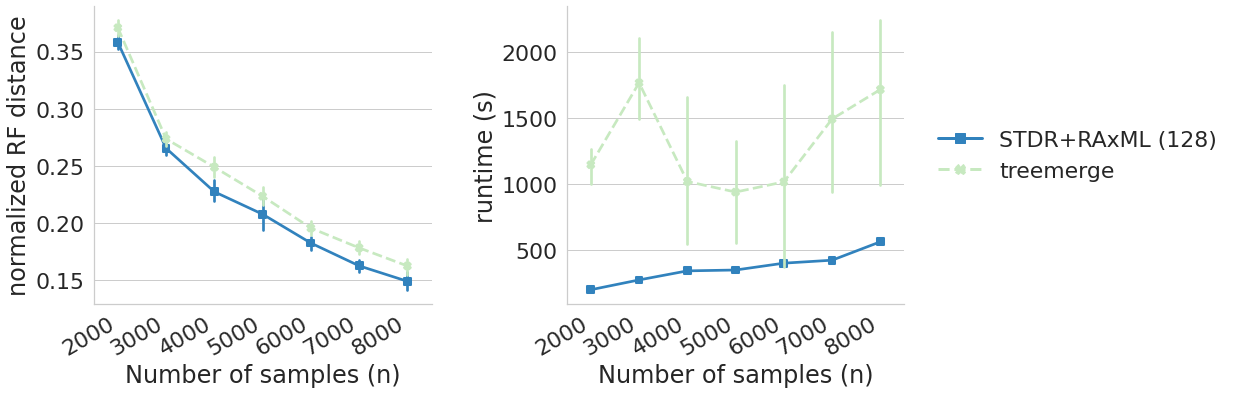

In [50]:
ordering = ["STDR+RAxML (128)", "treemerge"]
cmap = cm.get_cmap("tab20c", 20)
colors = [cmap(0), cmap(11)]
color_dict = dict(zip(ordering, colors))

selected = np.isin(df_long.method, ordering) & (df_long.performance.values != "F1")

df_long = df_long.iloc[selected,:]
df_long.loc[df_long.performance == "RF","value"] = df_long.loc[df_long.performance == "RF","value"] 
df_long.loc[df_long.performance == "RF","performance"] = "RF distance"
df_long.loc[df_long.performance == "runtime","performance"] = "runtime (s)"

markers = ["s", "X"]
color_subset = [colors[i] for i in [0,1]]
color_dict = dict(zip(ordering, np.array(color_subset)))
linestyles = ["-", "--"]

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.set(style = "whitegrid", font_scale = 2)
g = sns.catplot(data = df_long, x = "m", y = "value", hue = "method", hue_order = ordering,
           col = "performance", legend = False, kind = "point", sharey = False, height = 6,  aspect = 1.1,
                palette = color_dict, margin_titles = False, sizes = 20, markers = markers, linestyles=linestyles, 
                gridspec_kws={"wspace":0.4})

labels = ["normalized RF distance", "runtime (s)"]

for i, ax in enumerate(g.axes.flat):
    ax.set_ylabel(labels[i])
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
    
        
g.set_titles("")
g.set_xlabels("Number of samples (n)")

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0],  color=color_subset[x], marker = markers[x], markersize=10,linestyle = linestyles[x], lw = 3) for x in range(2)]

plt.legend(custom_lines, ordering, bbox_to_anchor=(1.04, 0.5), loc = "center left", frameon = False)

plt.subplots_adjust(wspace = 0.4)
plt.savefig("figs/STDR128_v_treemerge.eps", bbox_inches="tight")